# Classification Model On AirBnB Listings Data

**OSEMN Process**

In the course of this project we will be following the OSEMN data science process. Meaning we will first obtain the data. The data set we selected was found on kaggle.com in csv format, so we'll need to load it into the Jupyter notebook. Next we are going to scrub the data. Namely, we are going to check for and modify as needed the data types, null values, and required columns. When data cleaning is complete, we can perform exploratory data analysis: check the distributions, examine descriptive statistics, and create visualizations. Finally, we are going to model the data using holdout validation for the selected classification model.

**Dataset**

The data set we are using for this research contains 74,111 records over 29 columns and demonstrates AirBnB listings in Major US Cities: New York City, San Francisco, Washington D.C., Los Angeles, Chicago, and Boston. The columns present the following information:
> id, 
property_type, 
room_type, 
amenities, 
accommodates, 
bathrooms, 
bed_type, 
cancellation_policy, 
cleaning_fee, 
city, 
description, 
first_review, 
host_has_profile_pic, 
host_identity_verified, 
host_response_rate, 
host_since, 
instant_bookable, 
last_review, 
latitude, 
longitude, 
name, 
neighbourhood, 
number_of_reviews, 
review_scores_rating, 
thumbnail_url, 
zipcode, 
bedrooms, 
beds

**Goal**

The goal of this project is to determine how guests are going to rate their accommodation. Specifically, we will consider what parameters make an impact on ratings above or below 90. Originally, the metric we are going to predict consisted of floats, but to perform a classification solution we converted it to a binary outcome.

## Obtaining The Data

In [1]:
#load the necessary packages
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load the data set and view the first 5 rows
train = pd.read_csv("train.csv")
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
#view the number of rows and columns
train.shape

(74111, 29)

In [4]:
#view data types and data input in each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

Based on the problem we are solving, and the data presented, we are going to drop columns we will not need for this research

In [5]:
#drop unnecessary columns
df = train.drop(['id', 'amenities', 'description', 'latitude','longitude','name','neighbourhood','host_since','thumbnail_url','zipcode','log_price','city','first_review','bathrooms','last_review'], axis=1, inplace=False)
df.head()

,property_type,room_type,accommodates,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,Apartment,Entire home/apt,3,Real Bed,strict,True,t,t,NaN,f,2,100.0,1.0,1.0
1,Apartment,Entire home/apt,7,Real Bed,strict,True,t,f,100%,t,6,93.0,3.0,3.0
2,Apartment,Entire home/apt,5,Real Bed,moderate,True,t,t,100%,t,10,92.0,1.0,3.0
3,House,Entire home/apt,4,Real Bed,flexible,True,t,t,NaN,f,0,NaN,2.0,2.0
4,Apartment,Entire home/apt,2,Real Bed,moderate,True,t,t,100%,t,4,40.0,0.0,1.0


In [6]:
#view the resulting dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 14 columns):
property_type             74111 non-null object
room_type                 74111 non-null object
accommodates              74111 non-null int64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
instant_bookable          74111 non-null object
number_of_reviews         74111 non-null int64
review_scores_rating      57389 non-null float64
bedrooms                  74020 non-null float64
beds                      73980 non-null float64
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 7.4+ MB


## Scrubbing The Data

Let's convert *cleaning_fee, host_has_profile_pic, host_identity_verified, and instant_bookable* to string data type, and perform further data transformation. 

In [7]:
#convert to string
df.cleaning_fee = df.cleaning_fee.astype(str)
df.host_has_profile_pic = df.host_has_profile_pic.astype(str)
df.host_identity_verified = df.host_identity_verified.astype(str)
df.instant_bookable = df.instant_bookable.astype(str)

In [8]:
#map true or false values as 0 and 1
df.cleaning_fee = df.cleaning_fee.map({'False': 0, 'True': 1})
df.host_has_profile_pic = df.host_has_profile_pic.map({'f': 0, 't': 1})
df.host_identity_verified = df.host_identity_verified.map({'f': 0, 't': 1})
df.instant_bookable = df.instant_bookable.map({'f': 0, 't': 1})
df.head()

,property_type,room_type,accommodates,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,Apartment,Entire home/apt,3,Real Bed,strict,1,1.0,1.0,NaN,0,2,100.0,1.0,1.0
1,Apartment,Entire home/apt,7,Real Bed,strict,1,1.0,0.0,100%,1,6,93.0,3.0,3.0
2,Apartment,Entire home/apt,5,Real Bed,moderate,1,1.0,1.0,100%,1,10,92.0,1.0,3.0
3,House,Entire home/apt,4,Real Bed,flexible,1,1.0,1.0,NaN,0,0,NaN,2.0,2.0
4,Apartment,Entire home/apt,2,Real Bed,moderate,1,1.0,1.0,100%,1,4,40.0,0.0,1.0


In [9]:
#convert host_response_rate from % to float
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float')

In [10]:
#view results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 14 columns):
property_type             74111 non-null object
room_type                 74111 non-null object
accommodates              74111 non-null int64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null int64
host_has_profile_pic      73923 non-null float64
host_identity_verified    73923 non-null float64
host_response_rate        55812 non-null float64
instant_bookable          74111 non-null int64
number_of_reviews         74111 non-null int64
review_scores_rating      57389 non-null float64
bedrooms                  74020 non-null float64
beds                      73980 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 7.9+ MB


As we can see from the data above, *host_response_rate* has missing values, but this column might be helpful for us when identifying how customers rate their accommodations. For this reason, we are going to keep this column and will fill in NaNs with the median values.

In [11]:
#fill NaNs wiht median values and check for nas
df.host_response_rate = df.host_response_rate.fillna(df.host_response_rate.median())
df.isna().sum()

property_type                 0
room_type                     0
accommodates                  0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate            0
instant_bookable              0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

We have a relatively small amount of missing values in 4 categories, and 16,722 missing values in *review_scores_rating*. Since this is the category we are going to predict, filling in missing values with median scores might skew the data, so here we decide to drop all the NaNs.

In [12]:
#drop NaNs
df = df.dropna()
df.isna().sum()

property_type             0
room_type                 0
accommodates              0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

In [13]:
#view results
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57126 entries, 0 to 74110
Data columns (total 14 columns):
property_type             57126 non-null object
room_type                 57126 non-null object
accommodates              57126 non-null int64
bed_type                  57126 non-null object
cancellation_policy       57126 non-null object
cleaning_fee              57126 non-null int64
host_has_profile_pic      57126 non-null float64
host_identity_verified    57126 non-null float64
host_response_rate        57126 non-null float64
instant_bookable          57126 non-null int64
number_of_reviews         57126 non-null int64
review_scores_rating      57126 non-null float64
bedrooms                  57126 non-null float64
beds                      57126 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 6.5+ MB


In [14]:
#transform floats to integers
df.host_has_profile_pic = df.host_has_profile_pic.astype(int)
df.host_identity_verified = df.host_identity_verified.astype(int)
df.instant_bookable = df.instant_bookable.astype(int)
df.bedrooms = df.bedrooms.astype(int)
df.beds = df.beds.astype(int)
df.review_scores_rating = df.review_scores_rating.astype(int)
df.host_response_rate = df.host_response_rate.astype(int)

In [15]:
#view the first 5 rows
df.head()

,property_type,room_type,accommodates,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,Apartment,Entire home/apt,3,Real Bed,strict,1,1,1,100,0,2,100,1,1
1,Apartment,Entire home/apt,7,Real Bed,strict,1,1,0,100,1,6,93,3,3
2,Apartment,Entire home/apt,5,Real Bed,moderate,1,1,1,100,1,10,92,1,3
4,Apartment,Entire home/apt,2,Real Bed,moderate,1,1,1,100,1,4,40,0,1
5,Apartment,Private room,2,Real Bed,strict,1,1,1,100,1,3,100,1,1


Let's view the 5 point statistics and see what conclusions we can draw from the table.

In [16]:
df.describe()

,accommodates,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
count,57126.000000,57126.000000,57126.000000,57126.000000,57126.000000,57126.000000,57126.000000,57126.000000,57126.000000,57126.000000
mean,3.221440,0.794612,0.998372,0.728898,96.265938,0.268162,26.968176,94.072821,1.261790,1.739243
std,2.146025,0.403988,0.040316,0.444533,12.297843,0.443006,41.044811,7.828122,0.842357,1.266583
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,100.000000,0.000000,3.000000,92.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,100.000000,0.000000,11.000000,96.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,1.000000,100.000000,1.000000,33.000000,100.000000,1.000000,2.000000
max,16.000000,1.000000,1.000000,1.000000,100.000000,1.000000,605.000000,100.000000,10.000000,18.000000


Interestingly, the AirBnB hosts have a very high response rate to guests; it equals 100 in the 25% already. Most of the listings don't have a lot of reviews with 75% of cases having 33 reviews or less. The average review scores are pretty high for these properties: 50% of the listings have a score of 96 or higher.

Is there any correlation among the metrics influencing how customers rate their stay?

In [17]:
#create correlation table
df.corr()

,accommodates,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
accommodates,1.000000,0.177305,-0.009389,0.043938,0.026710,0.056561,0.031063,-0.017575,0.720580,0.824606
cleaning_fee,0.177305,1.000000,0.005265,0.107045,0.039351,0.017737,0.045462,0.034565,0.113148,0.125711
host_has_profile_pic,-0.009389,0.005265,1.000000,0.059376,0.009453,-0.006921,0.009923,0.006810,0.005333,-0.004542
host_identity_verified,0.043938,0.107045,0.059376,1.000000,0.031850,-0.093779,0.121440,0.055667,0.028673,0.027536
host_response_rate,0.026710,0.039351,0.009453,0.031850,1.000000,0.088315,0.072492,0.073784,0.018507,0.029024
instant_bookable,0.056561,0.017737,-0.006921,-0.093779,0.088315,1.000000,0.083113,-0.068871,-0.002550,0.058794
number_of_reviews,0.031063,0.045462,0.009923,0.121440,0.072492,0.083113,1.000000,0.011491,-0.038559,0.023084
review_scores_rating,-0.017575,0.034565,0.006810,0.055667,0.073784,-0.068871,0.011491,1.000000,0.010892,-0.027383
bedrooms,0.720580,0.113148,0.005333,0.028673,0.018507,-0.002550,-0.038559,0.010892,1.000000,0.704928
beds,0.824606,0.125711,-0.004542,0.027536,0.029024,0.058794,0.023084,-0.027383,0.704928,1.000000


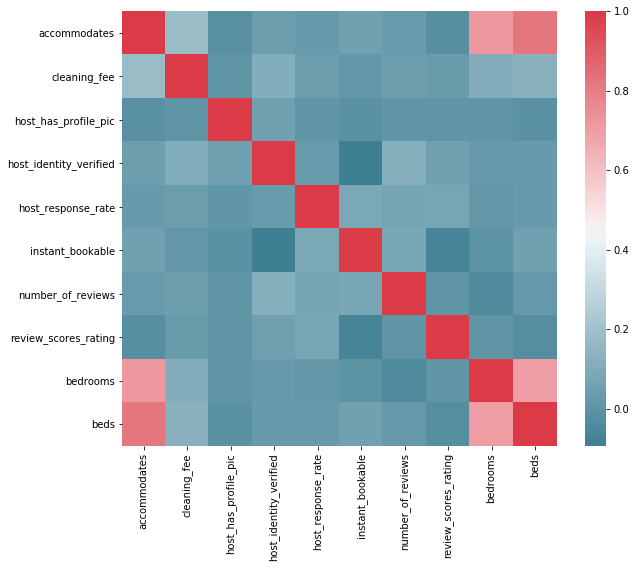

In [18]:
#visualize the correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Judging by the above view, there aren't any features that have a strong correlation, so we can proceed further with making our research parameter a binary metric for further modeling.

In [19]:
#add a new column with the binary label for scores above or below 90
df.loc[df['review_scores_rating']>90, "rating"] = "top"
df.loc[df['review_scores_rating']<=90, "rating"] = "low"

In [20]:
#drop the original column
df = df.drop(['review_scores_rating'], axis=1, inplace=False)
df.head()

,property_type,room_type,accommodates,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,bedrooms,beds,rating
0,Apartment,Entire home/apt,3,Real Bed,strict,1,1,1,100,0,2,1,1,top
1,Apartment,Entire home/apt,7,Real Bed,strict,1,1,0,100,1,6,3,3,top
2,Apartment,Entire home/apt,5,Real Bed,moderate,1,1,1,100,1,10,1,3,top
4,Apartment,Entire home/apt,2,Real Bed,moderate,1,1,1,100,1,4,0,1,low
5,Apartment,Private room,2,Real Bed,strict,1,1,1,100,1,3,1,1,top


## Data Visualization

Data visualization is an important step in the data science process. Exploratory data analysis helps us explore relationships between different metrics and helps us see the trends that might not be immediately noticeable when dealing with large amounts of data.

Essentially, we'll be predicting whether a listing has a rating higher or lower than 90. 

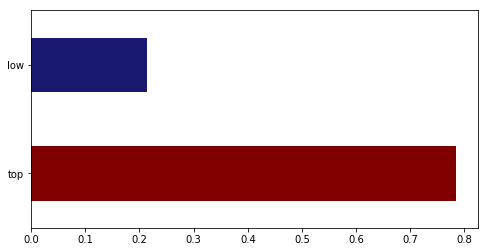

In [21]:
#plot rating
df['rating'].value_counts(normalize=True).plot(kind='barh', figsize=(8,4), 
                                             color=['maroon','midnightblue']);

Approximately, 80% of listings have a rating higher than 90, while about 20% have a lower score.

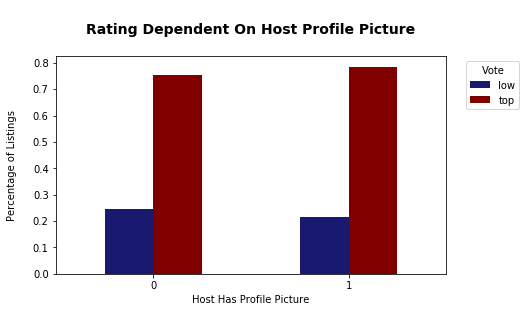

In [22]:
#rating dependent on whether the host has a profile picture
sub_df = df.groupby('host_has_profile_pic')['rating'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(7,4))
plt.xlabel("Host Has Profile Picture")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Listings\n")
plt.title('\nRating Dependent On Host Profile Picture\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

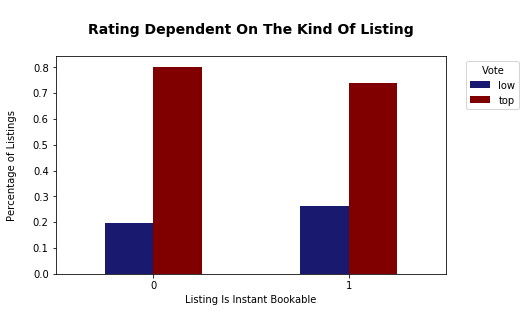

In [23]:
#rating dependent on whether the listing is instant bookable
sub_df = df.groupby('instant_bookable')['rating'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(7,4))
plt.xlabel("Listing Is Instant Bookable")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Listings\n")
plt.title('\nRating Dependent On The Kind Of Listing\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

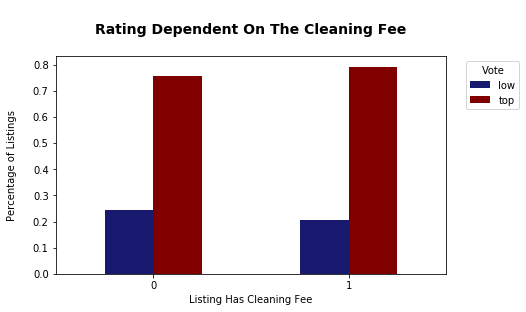

In [24]:
#rating dependent on whether there is cleaning fee
sub_df = df.groupby('cleaning_fee')['rating'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(7,4))
plt.xlabel("Listing Has Cleaning Fee")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Listings\n")
plt.title('\nRating Dependent On The Cleaning Fee\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

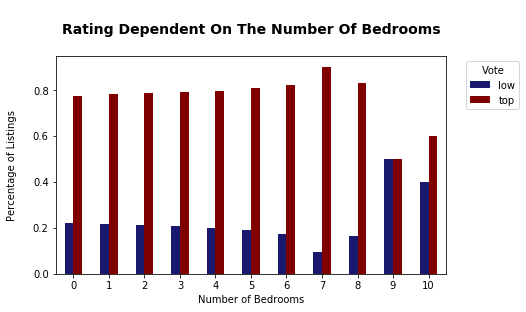

In [25]:
#rating dependent on the number of bedrooms
sub_df = df.groupby('bedrooms')['rating'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(7,4))
plt.xlabel("Number of Bedrooms")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Listings\n")
plt.title('\nRating Dependent On The Number Of Bedrooms\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

Reviewing the above visualizations, although the difference might be slim, but we can notice that listings where a host has a profile picture, that are not instatnly bookable, that have a cleaning fee and feature 7 bedrooms have a higher chance of getting a review over 90. 

## Modeling

Since machine learning algorithmms require a lot of data and can deal with categorical variables, we are going to one-hot encode the cateries in our data set.

In [26]:
#take out the target variable
target = df['rating']
df.drop('rating', axis=1, inplace=True)

In [27]:
#create dummy variables
df = pd.get_dummies(df)
df.head()

,accommodates,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,bedrooms,beds,property_type_Apartment,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,3,1,1,1,100,0,2,1,1,1,...,0,0,0,0,1,0,0,1,0,0
1,7,1,1,0,100,1,6,3,3,1,...,0,0,0,0,1,0,0,1,0,0
2,5,1,1,1,100,1,10,1,3,1,...,0,0,0,0,1,0,1,0,0,0
4,2,1,1,1,100,1,4,0,1,1,...,0,0,0,0,1,0,1,0,0,0
5,2,1,1,1,100,1,3,1,1,1,...,0,0,0,0,1,0,0,1,0,0


For this project, we are going to utilize one of the ensemble methods - random forest classifier. Ensemble methods have a much higher accuracy and prediction power than simple one step methods, although they take more computational capacity.

Some of the parameters we are going to use here are:
n_estimators = number of trees, 
criterion = splitting criterion (for maximizing the information gain from each split), 
max_features = max number of features considered for splitting a node, 
max_depth = max number of levels in each decision tree, 
min_samples_split = min samples needed to make a split

In [28]:
#split data and target into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(df, target, 
                                                                   test_size = 0.25, random_state=123)

For comparison with the random forest ensemble method, first off we are going to create a decision tree classifier.

In [29]:
#create and fit the tree
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
#check feature importance
tree_clf.feature_importances_

array([0.0421877 , 0.        , 0.        , 0.        , 0.26419331,
       0.15061286, 0.36543596, 0.        , 0.02003696, 0.0504586 ,
       0.        , 0.        , 0.01744278, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392065, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01218499, 0.02120538, 0.02320822, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0291126 , 0.        , 0.        ])

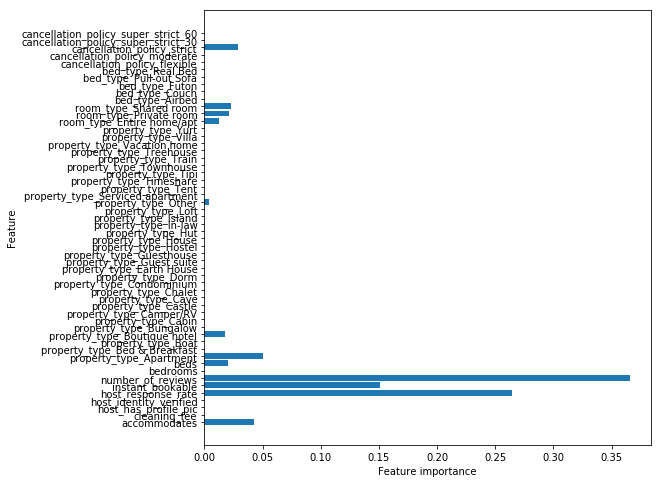

In [31]:
#visualize feature importance
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

Let's see how our model performs on data. We'll use classifier to get predictions on our test set, create a confusion matrix, and a classification report.

In [32]:
#run classifier
pred = tree_clf.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[   74  3020]
 [   81 11107]]
              precision    recall  f1-score   support

         low       0.48      0.02      0.05      3094
         top       0.79      0.99      0.88     11188

   micro avg       0.78      0.78      0.78     14282
   macro avg       0.63      0.51      0.46     14282
weighted avg       0.72      0.78      0.70     14282



In [33]:
#check the model accuracy
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 78.29%


Now for the first ensemble approach we are going to use bagging.

In [34]:
#create bagging classifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [35]:
#fit to training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [36]:
#check for training accuracy
bagged_tree.score(data_train, target_train)

0.78869853421716

In [37]:
#check for testing accuracy
bagged_tree.score(data_test, target_test)

0.7835037109648508

Moving forward, we are going to fit a random forests model and see how it performs in comparison with the prevous builds.

In [38]:
#create and fit classifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
#check training accuracy
forest.score(data_train, target_train)

0.7860610587246756

In [40]:
#check testing accuracy
forest.score(data_test, target_test)

0.7834336927601177

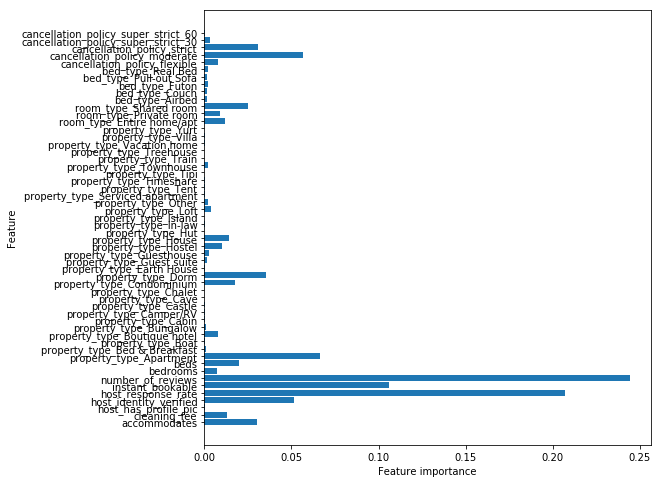

In [41]:
#check feature importance
plot_feature_importances(forest)

We have more features showing up than before which is pretty typical of random forests.

In [42]:
#create a forest with smaller trees
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
#get the first tree
rf_tree_1 = forest_2.estimators_[0]

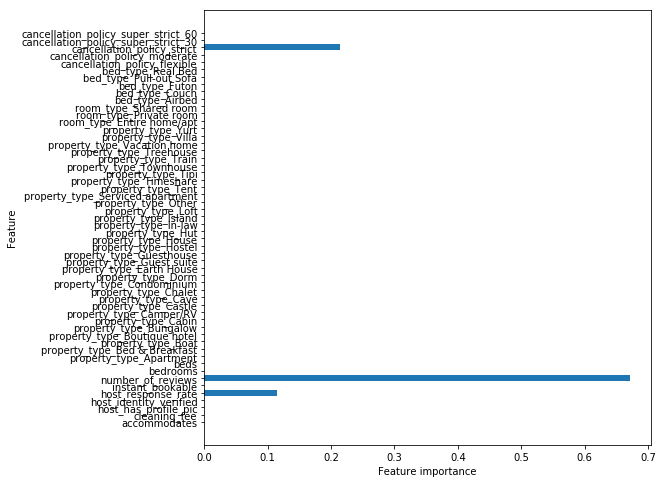

In [44]:
#check what features were used
plot_feature_importances(rf_tree_1)

In [45]:
#take second tree
rf_tree_2 = forest_2.estimators_[1]

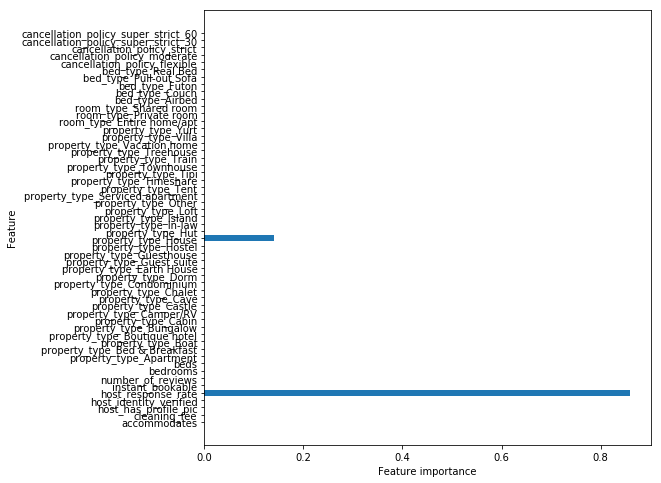

In [46]:
#consider the features
plot_feature_importances(rf_tree_2)

## Conclusion

The random forests model we created predicts the rating of a listing with an accuracy of 78.34%. Top 6 features with the importance of 5% or higher that factor into classifying the rating are the number of reviews, host response rate, whether the listing is instant bookable, property type - Apartment, moderate cancellation policy, verified host identity. 

Anectodally, these features do seem to make sense. For instance, if a listing has a lot of reviews it means it has been booked many times, and if it has been booked many times, chances are it is the place where people like to stay. The number of reviews also presents a well-rounded view of the listing, so the guests know what to expect, and even if they find something that's not to their liking, it's not a surprise, because they have already read about it in the review, so their choise of rating is not affected. 

Host response rate is also a telling indicator. The more the host replies, the higher the chances they build a relationship with their potential guest during the pre-booking process, so the guest are less likely to cancel and are more likely to rate the listing highly.

## Next Steps

The next steps for this research would be to build classification models relying on other machine learning algorithms: Logistic Regression, Support Vector Machines, and XGBoost. XGBoost is considered one of the most spot-on classificaton methods, so it would be interesting to consider if an accuracy of such model goes higher in comparison with the random forests. 

During the current research, we filled the missing values in response rate with median values. While this is a good way to deal with missing values, it might have affected the accuracy of our model and lead to skewed results. In further research we can consider dropping missing values altogether to only base our predictions on actual data.

For the purposes of our study, we took out some of the features from the original data set. However, some of them might have factored into how guests evaluate the listings. For instance, we have not considered the geographical component at all, while in further research we might discover that the rating depends on the city we are reviewing or, furthermore, on the location within the same city, i.e. listings in downtown area might be rated higher than those on the ourskirts.